In [21]:
import netCDF4 as nc
import numpy as np
import xarray as xr
import warnings
from eofs.xarray import Eof
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import gridspec
import datetime
import seaborn as sns
import cmocean as cmo
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from scipy.stats import linregress
import matplotlib.patches as mpatches
import scipy.io as sio
import matplotlib.colors as mcolors
import matplotlib.patches as patch
import sys
import os
from scipy.signal import welch
sys.path.append(os.path.abspath('../scripts'))
from proj_utils import *
from analysis_helpers import *
fig_path      = '../figures'

In [22]:
flux_north = xr.open_dataarray('../data/north_face_flux.nc')
flux_east  = xr.open_dataarray('../data/east_face_flux.nc')

In [23]:
north_spec = calc_flux_spec(flux_north)
east_spec  = calc_flux_spec(-flux_east)

# Plotting

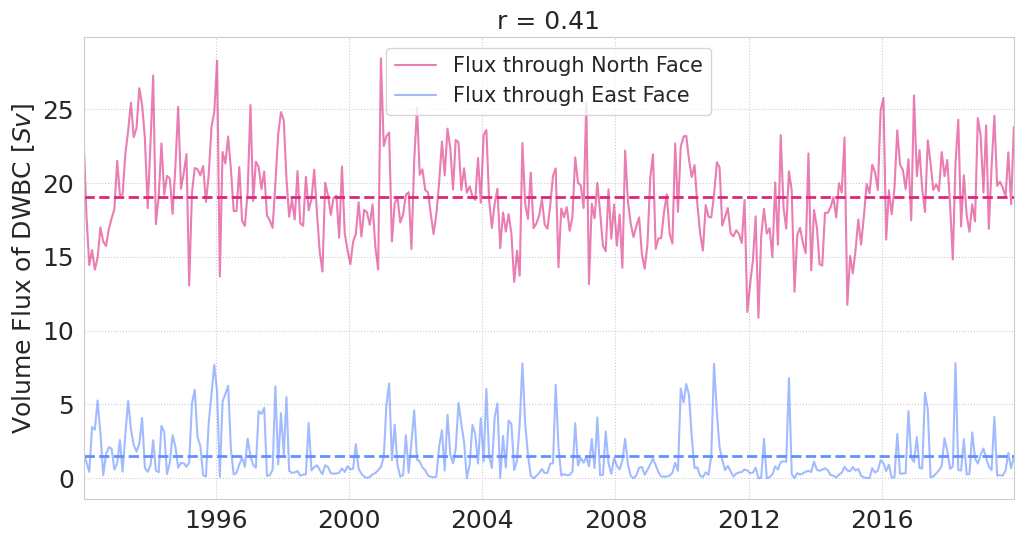

In [32]:
# --- Time Series of North Face and East Face Fluxes ---
sv_name = '/north_face_east_face_flux_ts'
sns.set_style('whitegrid',{"grid.linestyle": ":"})
fig     = plt.figure(figsize=(12, 6))

north_face   = plt.plot(flux_north.time,flux_north/1e6, c = '#dc267f', alpha = 0.6, label = 'Flux through North Face')
east_face    = plt.plot(flux_east.time,-flux_east/1e6, c = '#648fff', alpha = 0.6, label = 'Flux through East Face')

mean_north   = plt.axhline(flux_north.mean(dim='time').compute()/1e6, color = '#dc267f', linestyle = '--', linewidth = 2)
mean_east    = plt.axhline(-flux_east.mean(dim='time').compute()/1e6, color = '#648fff', linestyle = '--', linewidth = 2)

xtix = plt.yticks(fontsize=18)
xtix = plt.xticks(fontsize=18)

plt.xlim(flux_north.time[0],flux_north.time[-1])
plt.title('r = ' + str('{:.2f}'.format(np.corrcoef(flux_north,-flux_east)[0,1])), fontsize = 18)
np.corrcoef(flux_north,flux_east)
plt.legend(fontsize=15)
plt.ylabel('Volume Flux of DWBC [$Sv$]',fontsize = 18 )
plt.savefig(fig_path + sv_name + '.png', format='png', bbox_inches="tight",dpi=500)

[]

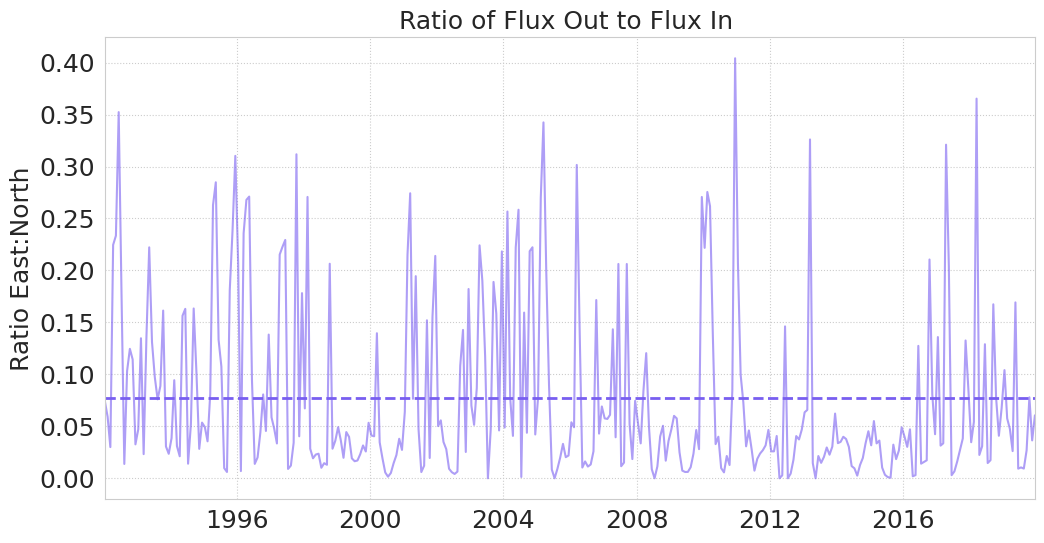

In [34]:
# --- Ratio of East:North ---
sv_name = '/north_face_east_face_ratio_ts'
sns.set_style('whitegrid',{"grid.linestyle": ":"})
fig     = plt.figure(figsize=(12, 6))

ratio  = plt.plot(flux_east.time, (-flux_east/flux_north), alpha = 0.6, c = '#785ef0')
mean_ratio   = plt.axhline((-flux_east/flux_north).mean(dim='time').compute(), color = '#785ef0', linestyle = '--', linewidth = 2)

xtix = plt.yticks(fontsize=18)
xtix = plt.xticks(fontsize=18)

plt.xlim(flux_north.time[0],flux_north.time[-1])
plt.title('Ratio of Flux Out to Flux In ', fontsize = 18)
np.corrcoef(flux_north,flux_east)
plt.ylabel('Ratio East:North',fontsize = 18 )
plt.savefig(fig_path + sv_name + '.png', format='png', bbox_inches="tight",dpi=500)

plt.plot()

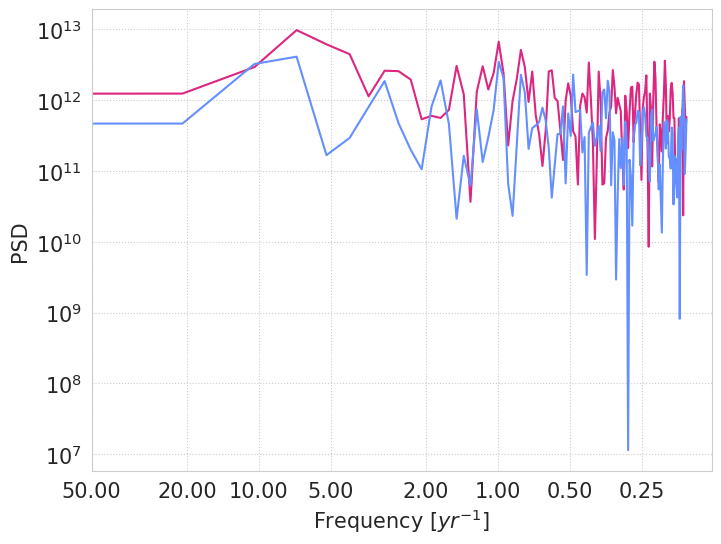

In [63]:
# ---  Spectra of North Face and East Face Fluxes ---
sv_name = '/north_face_east_face_specs'
fig     = plt.figure(figsize=(8, 6))
plt.xscale('log')
plt.yscale('log')
periods = np.array([0.25, 0.5, 1, 2, 5, 10, 20, 50])  # years
frequencies = 1 / periods
frequencies = frequencies[(frequencies >= freq.min()) & (frequencies <= freq.max())]
period_labels = [f'{1/f:.2f}' for f in frequencies]  # years

plt.plot(north_spec.frequency,north_spec,c = '#dc267f')
plt.plot(east_spec.frequency,east_spec,c = '#648fff')

plt.xticks(frequencies, labels=period_labels,fontsize = 15)
plt.yticks(fontsize = 15)



plt.xlabel('Frequency [$yr^{-1}$]',fontsize = 15)
plt.ylabel('PSD',fontsize = 15)
plt.savefig(fig_path + sv_name + '.png', format='png', bbox_inches="tight",dpi=500)